In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = 'test_results/BCICompet2b'

In [2]:
results = os.listdir(path)
results = [element for element in results if 'all_' not in element]
results

['2024-10-07_10-05-11-baseline-3.csv',
 '2024-10-07_12-08-50-cat.csv',
 '2024-10-07_12-11-05-attn.csv',
 '2024-10-07_12-12-57-avg.csv',
 '2024-10-07_12-15-50-ftr.csv']

In [3]:

columns = ['Subject', 'Accuracy', 'Kappa']
dfs = [pd.read_csv(os.path.join(path, result)) for result in results]
for df in dfs:
    df.columns = columns
for i in range(len(dfs)):
    dfs[i]['method'] = results[i].split('-')[-1].split('.')[0]
   
concat_df = pd.concat(dfs)

In [4]:

# Create Accuracy DataFrame
accuracy_df = concat_df.pivot(index='Subject', columns='method', values='Accuracy')

# Create Kappa DataFrame
kappa_df = concat_df.pivot(index='Subject', columns='method', values='Kappa')

In [5]:
# Calculate mean and standard deviation for Accuracy and Kappa
accuracy_mean = accuracy_df.mean()
accuracy_std = accuracy_df.std()
kappa_mean = kappa_df.mean()
kappa_std = kappa_df.std()

# Append mean and standard deviation to the DataFrames
accuracy_df.loc['Mean'] = accuracy_mean
accuracy_df.loc['Std'] = accuracy_std
kappa_df.loc['Mean'] = kappa_mean
kappa_df.loc['Std'] = kappa_std

In [6]:
accuracy_df

method,3,attn,avg,cat,ftr
Subject,,,,,
0,0.807500,0.827500,0.827500,0.832500,0.812500
1,0.752500,0.742500,0.740000,0.717500,0.727500
2,0.715000,0.707500,0.727500,0.725000,0.707500
3,0.916670,0.923810,0.930952,0.928571,0.926190
4,0.779048,0.807143,0.797619,0.807143,0.783333
5,0.782500,0.807500,0.817500,0.810000,0.792500
6,0.895000,0.900000,0.892500,0.897500,0.872500
7,0.756820,0.763636,0.759091,0.754545,0.743182
8,0.775000,0.777500,0.762500,0.805000,0.762500


In [7]:
kappa_df

method,3,attn,avg,cat,ftr
Subject,,,,,
0,0.615000,0.655000,0.655000,0.665000,0.625000
1,0.505000,0.485000,0.480000,0.435000,0.455000
2,0.430000,0.415000,0.455000,0.450000,0.415000
3,0.833333,0.847619,0.861905,0.857143,0.852381
4,0.552380,0.614286,0.595238,0.614286,0.566667
5,0.565000,0.615000,0.635000,0.620000,0.585000
6,0.790000,0.800000,0.785000,0.795000,0.745000
7,0.513640,0.527273,0.518182,0.509091,0.486364
8,0.550000,0.555000,0.525000,0.610000,0.525000


C:\Users\Nemes\AppData\Local\Temp\ipykernel_21560\4117713917.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=kappa_df.drop(['Mean', 'Std']), ci=None, color='#5F9EA0')


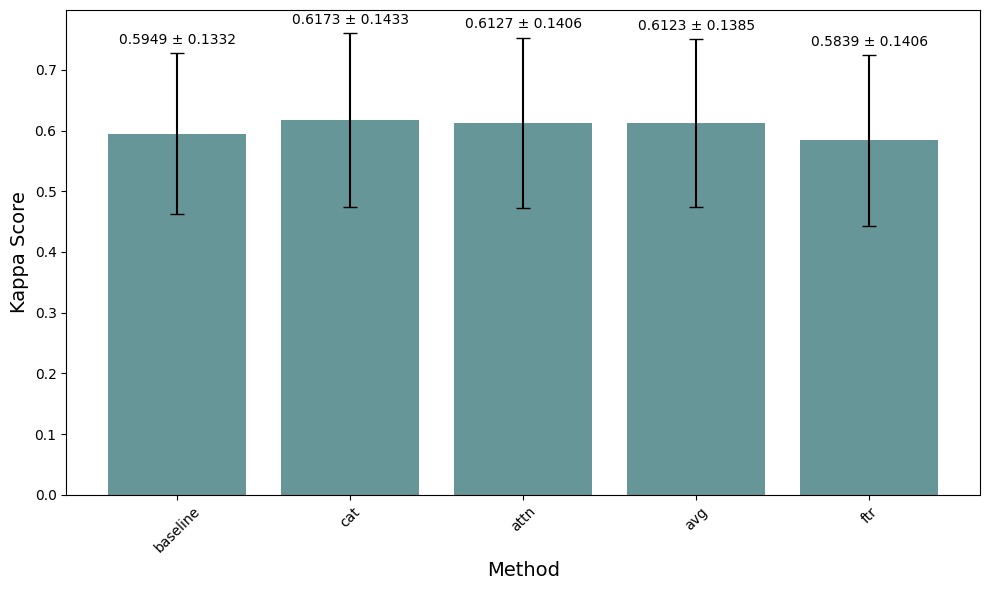

In [8]:
# Rename '3' to 'baseline'
kappa_df.rename(columns={'3': 'baseline'}, inplace=True)

# Reorder the columns
kappa_df = kappa_df[['baseline', 'cat', 'attn', 'avg', 'ftr']]

# Plot with the specified color
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=kappa_df.drop(['Mean', 'Std']), ci=None, color='#5F9EA0')

# Add error bars
for i, method in enumerate(kappa_df.columns):
    plt.errorbar(i, kappa_df.loc['Mean', method], yerr=kappa_df.loc['Std', method], fmt='none', c='black', capsize=5)
    # Annotate mean and std
    ax.text(i, kappa_df.loc['Mean', method] + kappa_df.loc['Std', method] + 0.01, 
            f"{kappa_df.loc['Mean', method]:.4f} ± {kappa_df.loc['Std', method]:.4f}", 
            ha='center', va='bottom', fontsize=10, color='black')

# Customize the plot
ax.set_xlabel('Method', fontsize=14)
ax.set_ylabel('Kappa Score', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
